In [1]:
import sys
sys.path.append("../")
import numpy as np
import astropy.units as u
import astropy.constants as const
from astropy.coordinates import Distance
from agnpy.emission_region import Blob
from agnpy.synchrotron import Synchrotron
import matplotlib.pyplot as plt

In [2]:
sed_x_label = r"$\nu\,/\,Hz$"
sed_y_label = r"$\nu F_{\nu}\,/\,(\mathrm{erg}\,\mathrm{cm}^{-2}\,\mathrm{s}^{-1})$"

In [3]:
spectrum_norm = 1e48 * u.Unit("erg")
parameters = {"p": 2.8, "gamma_min": 1e2, "gamma_max": 1e7}
spectrum_dict = {"type": "PowerLaw", "parameters": parameters}
R_b = 1e16 * u.cm
B = 1 * u.G
z = Distance(1e27, unit=u.cm).z
delta_D = 10
Gamma = 10
blob = Blob(R_b, z, delta_D, Gamma, B, spectrum_norm, spectrum_dict)
print(f"total density {blob.norm:.2e}")
print(f"total energy {blob.W_e:.2e}")

normalising power-law to total energy density u_e: 2.39e-01 erg / cm3
total density 1.30e+03 1 / cm3
total energy 1.00e+48 erg


In [4]:
print(blob)

* spherical emission region
 - R_b (radius of the blob): 1.00e+16 cm
 - V_b (volume of the blob): 4.19e+48 cm3
 - z (source redshift): 0.07
 - d_L (source luminosity distance):1.00e+27 cm
 - delta_D (blob Doppler factor): 1.00e+01
 - Gamma (blob Lorentz factor): 1.00e+01
 - Beta (blob relativistic velocity): 9.95e-01
 - mu_s (cosine of the jet viewing angle): 9.95e-01
 - B (magnetic field tangled to the jet): 1.00e+00 G
 - electron spectra:
  |- normalisation: 1.00e+48 erg
  |- spectral function: PowerLaw
  |- gamma_min (minimum Lorentz factor): 1.00e+02
  '- gamma_max (maximum Lorentz factor): 1.00e+07



In [5]:
synch = Synchrotron(blob)

../agnpy/synchrotron.py:38: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "_com_sed_emissivity" failed type inference due to: Invalid use of Function(<function trapz at 0x1145a7950>) with argument(s) of type(s): (array(float64, 2d, C), array(float64, 1d, C), axis=Literal[int](0))
 * parameterized
In definition 0:
    TypeError: np_trapz() got an unexpected keyword argument 'axis'
    raised from /Users/cosimo/software/miniconda3/lib/python3.7/site-packages/numba/typing/templates.py:517
In definition 1:
    TypeError: np_trapz() got an unexpected keyword argument 'axis'
    raised from /Users/cosimo/software/miniconda3/lib/python3.7/site-packages/numba/typing/templates.py:517
This error is usually caused by passing an argument of a type that is unsupported by the named function.
[1] During: resolving callee type: Function(<function trapz at 0x1145a7950>)
[2] During: typing of call at ../agnpy/synchrotron.py (60)


File "../agnpy/sync

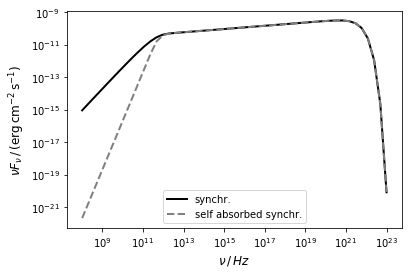

In [6]:
nu = np.logspace(8, 23) * u.Hz
plt.loglog(nu, synch.sed_flux(nu), lw=2, color="k", label="synchr.")
plt.loglog(nu, synch.sed_flux(nu, SSA=True), lw=2, ls="--", color="gray", label="self absorbed synchr.")
plt.xlabel(sed_x_label, fontsize=12)
plt.ylabel(sed_y_label, fontsize=12)
plt.legend()
plt.show()

In [7]:
%%timeit 
synch.sed_flux(nu)

1.09 ms ± 8.55 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [8]:
%%timeit 
synch.sed_flux(nu, SSA=True)

1.97 ms ± 22.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
